<a href="https://colab.research.google.com/github/dipnarayan501/Deep_learning/blob/main/CS6910_Assignment1(Q7%2C10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist, fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
def prepare_dataset():
    (X, y), (X_test, y_test) = fashion_mnist.load_data()

    # Reshaping the data matrices
    X = X.reshape(X.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # Normalizing the pixel intensities
    X = X/255.0
    X_test = X_test/255.0
    
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    
    y_train_encode = np.zeros((10,y_train.shape[0]))
    y_train_encode[y_train, np.array(list(range(y_train.shape[0])))] = 1

    y_val_encode = np.zeros((10,y_val.shape[0]))
    y_val_encode[y_val, np.array(list(range(y_val.shape[0])))] = 1

    
    
    print("Number of examples in training set")
    print(X_train.shape)
    print(y_train_encode.shape)
    print(y_train.shape)
    
    print("No of examples in validation set")
    print(X_val.shape)
    print(y_val.shape)
    print("No of examples in test set")
    print(X_test.shape)
    print(y_test.shape)
    
    return X_train.T, y_train_encode, y_train.T ,X_val.T, y_val.T, X_test.T, y_test.T, y_val_encode


X_train, y_train_encode, y_train ,X_val, y_val, X_test, y_test,y_val_encode = prepare_dataset() 

Number of examples in training set
(54000, 784)
(10, 54000)
(54000,)
No of examples in validation set
(6000, 784)
(6000,)
No of examples in test set
(10000, 784)
(10000,)


In [24]:
def sigmoid(x):
    return 1. / (1.+np.exp(-x))
def relu(x):
    return np.maximum(0,x)
def tanh(x):
    return np.tanh(x)
def softmax(x):
    soft = np.zeros(x.shape)
    for i in range(0, x.shape[1]):
        numr = np.exp(x[:, i])
        soft[:, i] = numr/np.sum(numr)
    return soft

#Derivatives
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))
def relu_derivative(x):
    return 1*(x>0) 
def tanh_derivative(x):
    return (1 - (np.tanh(x)**2))



def initialize_parameters(input_layer, hidden_layer, output_layer,initilisation):
    weights = []
    biases  = []
    layers = [input_layer] + hidden_layer + [output_layer]
    for i in range(len(hidden_layer)+1):
        if initilisation == 'random':
            weights.append(np.random.rand(layers[i+1], layers[i])*0.01)
        if initilisation == 'xavier':
            weights.append(np.random.randn(layers[i+1],layers[i])*np.sqrt(2/layers[i+1]))
        biases.append(np.random.randn(layers[i+1],1))
    return weights, biases

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error

class ANN:

    def __init__(self,input_layer,hidden_layer,output_layer,initialisation, activation,loss_function):
           
        self.input_layer   = input_layer
        self.output_layer  = output_layer
        self.weights    = []
        self.biases     = []
        self.initialisation = initialisation
        self.hidden_layer   = hidden_layer
        self.activation = activation
        self.loss_function = loss_function

        self.weights,self.biases = initialize_parameters(self.input_layer,self.hidden_layer,self.output_layer,self.initialisation)

    
    

    def forward_propagation(self,input):

        self.A = []
        self.H  = []
        k=0
        
        self.A.append(np.dot(self.weights[k],input)+self.biases[k])
        if self.activation == 'sigmoid':
          self.H.append(sigmoid(self.A[k]))
        elif self.activation == 'tanh':
          self.H.append(tanh(self.A[k]))
        elif self.activation == 'relu': 
          self.H.append(relu(self.A[k])) 


        for k in range(1,len(self.hidden_layer)):
            self.A.append(np.dot(self.weights[k],self.H[k-1])+self.biases[k])
            if self.activation == 'sigmoid':
              self.H.append(sigmoid(self.A[k]))
            elif self.activation == 'tanh':
              self.H.append(tanh(self.A[k]))
            elif self.activation == 'relu': 
              self.H.append(relu(self.A[k])) 
 


        k=len(self.hidden_layer)
        self.A.append(np.matmul(self.weights[k],self.H[k-1])+self.biases[k])
        self.H.append(softmax(self.A[k]))

        return self.H[-1]

    def back_propagation(self,X_train,y_train):

        g_a  = [0]*(len(self.hidden_layer)+1)
        g_h  = [0]*(len(self.hidden_layer)+1)
        g_w  = [0]*(len(self.weights))
        g_b  = [0]*(len(self.biases))

        n_samples = X_train.shape[1] 

        for k in reversed(range(len(self.hidden_layer)+1)):
            if k == len(self.hidden_layer):
              if self.loss_function == 'cross_entropy':
                  g_a[k] = self.H[k]  - y_train  
              elif self.loss_function == 'square_loss': 
                  g_a[k] = (self.H[k] - y_train) * self.H[k] * (1 - self.H[k]) 
                
            else:
                g_h[k] = (1/n_samples)*np.matmul(self.weights[k+1].T,g_a[k+1])
                if self.activation == 'sigmoid':
                  g_a[k] = (1/n_samples)*np.multiply(g_h[k],sigmoid_derivative(self.A[k]))
                elif self.activation == 'tanh':
                  g_a[k] = (1/n_samples)*np.multiply(g_h[k],tanh_derivative(self.A[k]))
                elif self.activation == 'relu':
                  g_a[k] = (1/n_samples)*np.multiply(g_h[k],relu_derivative(self.A[k]))
                

            if k == 0:
                g_w[k] = (1/n_samples)*np.matmul(g_a[k],X_train.T) 
            else:
                g_w[k] = (1/n_samples)*np.matmul(g_a[k],self.H[k-1].T)

            g_b[k]  = (1/n_samples)*np.sum(g_a[k], axis=1, keepdims = True)
        return g_w,g_b


    def predict(self, X,y ):
      output =  self.forward_propagation(X)
      out_class=(np.argmax(output,axis=0))
      accuracy = round(accuracy_score(y, out_class) * 100, 3)
      return accuracy , out_class

    def fit_predict(self,X_train,y_train,X_val ,y_val ,learning_rate,epochs, optimiser='gd',batch_size = 64,lambd=0.0005): 

      update_w = np.multiply(self.weights,0)
      update_b = np.multiply(self.biases,0)
      pre_update_w = np.multiply(self.weights,0)
      pre_update_b = np.multiply(self.biases,0)
      vw = 0.0
      vb = 0.0
      eps = 1e-8
      gamma = 0.9
      beta = 0.999
      beta1 = 0.9
      beta2 = 0.999
      m_t, v_t, m_hat_w, v_hat_w, m_b,v_b,m_hat_b,v_hat_b = 0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 
      train_accuracy = []
      val_accuracy = []
      training_loss ,validation_loss = [] ,[]
      for i in range(epochs):
        

            for batch in range(0, X_train.shape[1], batch_size):

              train_b_imag =  X_train[:,batch:batch+batch_size]
              train_l_imag =  y_train_encode[:,batch:batch+batch_size]
              output =  self.forward_propagation(train_b_imag)
              g_weights,g_biases = self.back_propagation(train_b_imag,train_l_imag)
              if optimiser == 'gd':
                 self.weights = self.weights - np.multiply(learning_rate,g_weights) - np.multiply(learning_rate*lambd,self.weights)
                 self.biases = self.biases - np.multiply(learning_rate,g_biases)
             
              if optimiser == 'mgd':
                 
                 update_w = np.multiply(gamma,pre_update_w) + np.multiply(learning_rate,g_weights)
                 self.weights = self.weights - update_w - np.multiply(learning_rate*lambd,self.weights)
                
                 update_b = np.multiply(gamma,pre_update_b) + np.multiply(learning_rate,g_biases)
                 self.biases = self.biases - update_b
                 pre_update_w = update_w
                 pre_update_b = update_b

              if optimiser == 'ngd':
                 
                 cache_w = self.weights
                 cache_b = self.biases
                 self.weights = self.weights - np.multiply(gamma,pre_update_w)
                 self.biases = self.biases - np.multiply(gamma,pre_update_b)
                 output =  self.forward_propagation(train_b_imag)
                 g_weights,g_biases = self.back_propagation(train_b_imag,train_l_imag)

                 update_w = np.multiply(gamma,pre_update_w) + np.multiply(learning_rate,g_weights)
                 cache_w = cache_w - update_w - np.multiply(learning_rate*lambd,cache_w)
                    
                 update_b = np.multiply(gamma,pre_update_b) + np.multiply(learning_rate,g_biases)
                 cache_b = cache_b - update_b
                 
                 self.weights = cache_w
                 self.biases = cache_b
                 pre_update_w = update_w
                 pre_update_b = update_b
                
              if optimiser == 'rmsprop': 

                 vw = np.multiply(vw,beta) + np.multiply(1-beta,np.power(g_weights,2))
                 vb = np.multiply(vb,beta) + np.multiply(1-beta,np.power(g_biases,2))

          
                 update_w = np.multiply(g_weights,learning_rate/np.power(vw+eps,1/2))
                 update_b = np.multiply(g_biases,learning_rate/np.power(vb+eps,1/2))
                 
                 self.weights = self.weights - update_w - np.multiply(learning_rate*lambd,self.weights)
                 self.biases = self.biases - update_b
                    
              if optimiser == 'adam':
                 m_t = np.multiply(beta1,m_t) + np.multiply(1-beta1,g_weights)
                 v_t = np.multiply(beta2,v_t) + np.multiply(1-beta2,np.power(g_weights,2))
                 m_b = np.multiply(beta1,m_b) + np.multiply(1-beta1,g_biases)
                 v_b = np.multiply(beta2,v_b) + np.multiply(1-beta2,np.power(g_biases,2))
                
                 m_hat_w = m_t/(1 - np.power(beta1,i+1))
                 m_hat_b = m_b/(1 - np.power(beta1,i+1))
                
                 v_hat_w = v_t/(1 - np.power(beta2,i+1))
                 v_hat_b = v_b/(1 - np.power(beta2,i+1))
                 update_w = (learning_rate / np.power(v_hat_w + eps, 1/2)) * m_hat_w
                 update_b = (learning_rate / np.power(v_hat_b + eps, 1/2)) * m_hat_b
                 self.weights = self.weights - update_w - np.multiply(learning_rate*lambd,self.weights)
                 self.biases = self.biases - update_b

              if optimiser == 'nadam':
                 
                 self.weights = self.weights - np.multiply(gamma,update_w)
                 self.biases  = self.biases  - np.multiply(gamma,update_b)

                 g_weights,g_biases = self.back_propagation(train_b_imag,train_l_imag)

                 m_t =  np.multiply(beta1,m_t) + np.multiply(1 - beta1,g_weights)
                 v_t =  np.multiply(beta2,v_t) + np.multiply(1 - beta2,np.power(g_weights, 2))

                 m_b =  np.multiply(beta1,m_b) + np.multiply(1 - beta1,g_biases)
                 v_b =  np.multiply(beta2,v_b) + np.multiply(1 - beta2,np.power(g_biases, 2))
                
                 m_hat_w = m_t / (1 - np.power(beta1, i+1)) 
                 v_hat_t = v_t / (1 - np.power(beta2, i+1))

                 m_hat_b = m_b / (1 - np.power(beta1, i+1)) 
                 v_hat_b = v_b / (1 - np.power(beta2, i+1))
  
                 a1 = (1-beta1)/(1-np.power(beta,i+1))
                 update_w = np.multiply(learning_rate/(np.power(v_hat_t + eps,1/2)),(np.multiply(a1,g_weights) + np.multiply(beta1,m_hat_w)))#(a4 + a2))
                 update_b = np.multiply(learning_rate/(np.power(v_hat_b + eps,1/2)),(np.multiply(a1,g_biases)+np.multiply(beta1,m_hat_b) ))#(a5 + a3))
                 self.weights = self.weights - update_w - np.multiply(learning_rate*lambd,self.weights)
                 self.biases = self.biases - update_b             

            #Training loss for full dataset
            predicted_train = self.forward_propagation(X_train)
            predicted_train_label=(np.argmax(predicted_train,axis=0)) 
            acc1 = 100*np.sum(predicted_train_label==y_train)/predicted_train.shape[1]
            train_accuracy.append(acc1)


            predicted_val = self.forward_propagation(X_val)
            predicted_val_label=(np.argmax(predicted_val,axis=0))
            acc2 = 100*np.sum(predicted_val_label==y_val)/predicted_val.shape[1]   
            val_accuracy.append(acc2)

            a =self.weights[1:len(self.hidden_layer)]
            b = np.sum([(np.sum((a[i]**2).reshape(1,-1))) for i in range(len(a))]) 
            if self.loss_function == 'cross_entropy':
              train_loss = (-np.sum(np.multiply(y_train_encode,np.log(predicted_train)))+((lambd/2.)*b))/y_train.shape[0]
              val_loss = (-np.sum(np.multiply(y_val_encode,np.log(predicted_val)))+((lambd/2.)*b))/y_val.shape[0]

            elif self.loss_function == 'square_loss':

              val_loss =((1/2) * np.sum((y_val_encode- predicted_val)**2))/y_val.shape[0]
              train_loss = (1/2) * np.sum((y_train_encode - predicted_train)**2)/y_train.shape[0]
            training_loss.append(train_loss)
            validation_loss.append(val_loss)
              
 
            print('Epoch {}: training_accuracy = {:.2f}, training_loss = {:.5f},Validation accuracy = {:.2f},Validation loss = {:.5f}'.format(i,acc1,train_loss, acc2,val_loss))


         
      return train_accuracy,val_accuracy,training_loss, validation_loss

In [26]:
! pip install wandb


Q7) Predicting test dataset using best configuration obtained from training model in sweep 

In [27]:
#Q7
n_class = 10
model = ANN(28*28,[128,128,128],n_class, initialisation = 'xavier', activation='tanh', loss_function = 'cross_entropy')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
acc1,acc2,train_loss, val_loss= model.fit_predict(X_train,y_train,X_val ,y_val ,learning_rate = 0.01,epochs=15, optimiser='adam',batch_size =64,lambd=0.0005)


Epoch 0: training_accuracy = 79.21, training_loss = 0.56504,Validation accuracy = 78.67,Validation loss = 0.57808
Epoch 1: training_accuracy = 81.79, training_loss = 0.49666,Validation accuracy = 80.88,Validation loss = 0.51412
Epoch 2: training_accuracy = 82.75, training_loss = 0.47454,Validation accuracy = 81.92,Validation loss = 0.49469
Epoch 3: training_accuracy = 83.28, training_loss = 0.46234,Validation accuracy = 82.53,Validation loss = 0.48453
Epoch 4: training_accuracy = 83.60, training_loss = 0.45443,Validation accuracy = 82.78,Validation loss = 0.47800
Epoch 5: training_accuracy = 83.83, training_loss = 0.44836,Validation accuracy = 83.00,Validation loss = 0.47293
Epoch 6: training_accuracy = 83.99, training_loss = 0.44335,Validation accuracy = 83.08,Validation loss = 0.46874
Epoch 7: training_accuracy = 84.13, training_loss = 0.43905,Validation accuracy = 83.17,Validation loss = 0.46516
Epoch 8: training_accuracy = 84.24, training_loss = 0.43524,Validation accuracy = 83.17,

Plotting confusion matrix for Fashion-MNIST test accuracy  dataset

Test accuracy  82.97


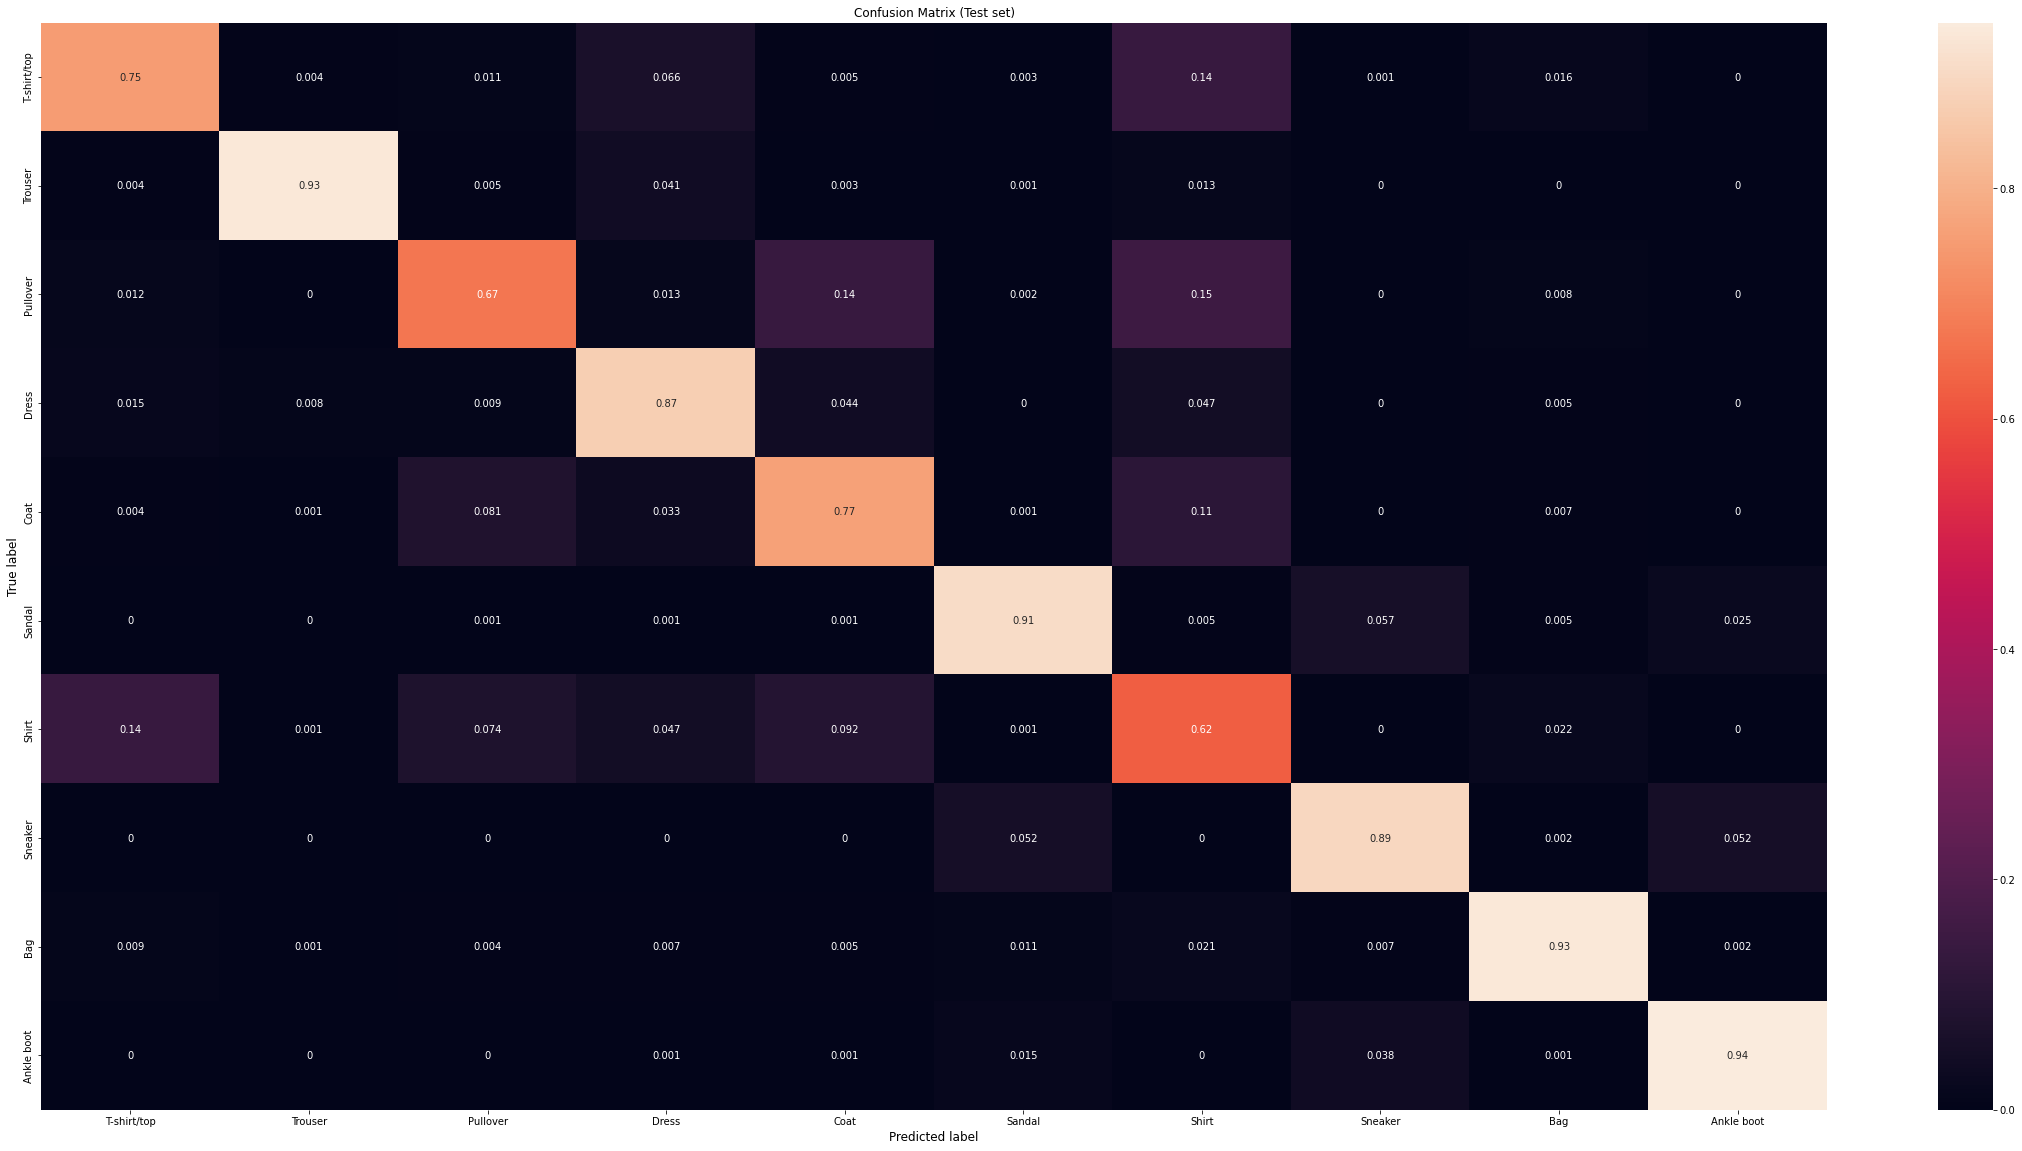

In [28]:
import wandb
wandb.init(project="test_confusion", entity="moni6264", name="confusion_matrix")
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
accuracy, test_predicted = model.predict(X_test,y_test)
bern_cnf_matrix_train = confusion_matrix(y_test, test_predicted, normalize='true')
plt.figure(figsize=(40,20))
ax = sns.heatmap(bern_cnf_matrix_train, annot=bern_cnf_matrix_train,xticklabels=class_names, yticklabels=class_names)
ax.set_title("Confusion Matrix (Test set)", size=12)
ax.set_xlabel("Predicted label", size=12)
ax.set_ylabel("True label", size=12)
plt.savefig("Test_confusionmatrix")
# Load the confusion matrix images
img1 = plt.imread("Test_confusionmatrix.png")

print("Test accuracy ",accuracy)
# Log images of the confusion matrices
wandb.log({"Confusion Matrix - Test set": wandb.Image(img1)})


Question 10 MNIST dataset

Prepare MNIST dataset

In [ ]:
from keras.datasets import mnist

def prepare_dataset():
    (X, y), (X_test, y_test) = mnist.load_data()

    # Reshaping the data matrices
    X = X.reshape(X.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    # Normalizing the pixel intensities
    X = X/255.0
    X_test = X_test/255.0
   
   
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
   
    y_train_encode = np.zeros((10,y_train.shape[0]))
    y_train_encode[y_train, np.array(list(range(y_train.shape[0])))] = 1

    y_val_encode = np.zeros((10,y_val.shape[0]))
    y_val_encode[y_val, np.array(list(range(y_val.shape[0])))] = 1

   
   
    print("Number of examples in training set")
    print(X_train.shape)
    print(y_train_encode.shape)
    print(y_train.shape)
   
    print("No of examples in validation set")
    print(X_val.shape)
    print(y_val.shape)
    print("No of examples in test set")
    print(X_test.shape)
    print(y_test.shape)
   
    return X_train.T, y_train_encode, y_train.T ,X_val.T, y_val.T, X_test.T, y_test.T, y_val_encode


X_train, y_train_encode, y_train ,X_val, y_val, X_test, y_test,y_val_encode = prepare_dataset()



11501568/11490434 [==============================] - 0s 0us/step
Number of examples in training set
(54000, 784)
(10, 54000)
(54000,)
No of examples in validation set
(6000, 784)
(6000,)
No of examples in test set
(10000, 784)
(10000,)


Configuration_1

In [ ]:
#configuration 1
model1 = ANN(28*28,[128,128,128],n_class, initialisation = 'xavier', activation='tanh', loss_function = 'cross_entropy')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
acc1,acc2,train_loss, val_loss= model1.fit_predict(X_train,y_train,X_val ,y_val ,learning_rate = 0.01,epochs=20, optimiser='adam',batch_size =64,lambd=0.0005)
accuracy, test_predicted = model1.predict(X_test,y_test)
print("Test accuracy: ", accuracy)

Epoch 0: training_accuracy = 89.22, training_loss = 0.35056,Validation accuracy = 89.22,Validation loss = 0.36214
Epoch 1: training_accuracy = 91.03, training_loss = 0.29346,Validation accuracy = 90.97,Validation loss = 0.30824
Epoch 2: training_accuracy = 92.09, training_loss = 0.26109,Validation accuracy = 91.53,Validation loss = 0.27843
Epoch 3: training_accuracy = 92.66, training_loss = 0.24197,Validation accuracy = 92.03,Validation loss = 0.26119
Epoch 4: training_accuracy = 93.05, training_loss = 0.22902,Validation accuracy = 92.33,Validation loss = 0.24968
Epoch 5: training_accuracy = 93.38, training_loss = 0.21910,Validation accuracy = 92.38,Validation loss = 0.24096
Epoch 6: training_accuracy = 93.59, training_loss = 0.21094,Validation accuracy = 92.53,Validation loss = 0.23385
Epoch 7: training_accuracy = 93.79, training_loss = 0.20395,Validation accuracy = 92.70,Validation loss = 0.22783
Epoch 8: training_accuracy = 94.02, training_loss = 0.19782,Validation accuracy = 92.90,

Configuration_2

In [ ]:
#configuaration 2
model2 = ANN(28*28,[128,128,128], n_class , initialisation = 'xavier', activation='tanh', loss_function = 'cross_entropy')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
acc1,acc2,train_loss, val_loss= model2.fit_predict(X_train,y_train,X_val ,y_val ,learning_rate = 0.001,epochs=15, optimiser='nadam',batch_size =128,lambd=0.0005)
accuracy, test_predicted = model2.predict(X_test,y_test)
print("Test accuracy: ", accuracy)


Epoch 0: training_accuracy = 82.80, training_loss = 0.53377,Validation accuracy = 82.50,Validation loss = 0.54923
Epoch 1: training_accuracy = 86.34, training_loss = 0.43838,Validation accuracy = 86.32,Validation loss = 0.45779
Epoch 2: training_accuracy = 87.50, training_loss = 0.40405,Validation accuracy = 87.43,Validation loss = 0.42537
Epoch 3: training_accuracy = 88.16, training_loss = 0.38183,Validation accuracy = 88.08,Validation loss = 0.40463
Epoch 4: training_accuracy = 88.59, training_loss = 0.36568,Validation accuracy = 88.57,Validation loss = 0.38976
Epoch 5: training_accuracy = 88.99, training_loss = 0.35314,Validation accuracy = 88.87,Validation loss = 0.37837
Epoch 6: training_accuracy = 89.29, training_loss = 0.34294,Validation accuracy = 89.07,Validation loss = 0.36923
Epoch 7: training_accuracy = 89.61, training_loss = 0.33437,Validation accuracy = 89.32,Validation loss = 0.36162
Epoch 8: training_accuracy = 89.90, training_loss = 0.32699,Validation accuracy = 89.48,

Configuration_3

In [ ]:
#configuration 3
model3 = ANN(28*28,[128,128], n_class , initialisation = 'xavier', activation='relu', loss_function = 'cross_entropy')
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
acc1,acc2,train_loss, val_loss= model3.fit_predict(X_train,y_train,X_val ,y_val ,learning_rate = 0.01,epochs=10, optimiser='rmsprop',batch_size =64,lambd=0.0005)
accuracy, test_predicted = model3.predict(X_test,y_test)
print("Test accuracy: ", accuracy)

Epoch 0: training_accuracy = 88.29, training_loss = 0.37387,Validation accuracy = 87.57,Validation loss = 0.38570
Epoch 1: training_accuracy = 90.85, training_loss = 0.29311,Validation accuracy = 90.35,Validation loss = 0.31238
Epoch 2: training_accuracy = 92.03, training_loss = 0.25137,Validation accuracy = 91.27,Validation loss = 0.27720
Epoch 3: training_accuracy = 92.95, training_loss = 0.22107,Validation accuracy = 92.13,Validation loss = 0.25336
Epoch 4: training_accuracy = 93.55, training_loss = 0.20044,Validation accuracy = 92.75,Validation loss = 0.23995
Epoch 5: training_accuracy = 94.06, training_loss = 0.18425,Validation accuracy = 92.97,Validation loss = 0.23246
Epoch 6: training_accuracy = 94.57, training_loss = 0.16994,Validation accuracy = 93.20,Validation loss = 0.22484
Epoch 7: training_accuracy = 94.75, training_loss = 0.16183,Validation accuracy = 93.33,Validation loss = 0.22349
Epoch 8: training_accuracy = 95.05, training_loss = 0.15280,Validation accuracy = 93.48,